# Lab 2 - report, Michał Błaszczak [245047]

# Task 1

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# removed first row from csv file because it caused importing one column only
# also renamed 1st column

### import data and set datetime index

In [3]:
df_POL = pd.read_csv("multiTimeline.csv", index_col = 'Date', parse_dates = True)
df_USA = pd.read_csv("multiTimeline-2.csv", index_col = 'Date', parse_dates = True)
df_UK = pd.read_csv("multiTimeline-3.csv", index_col = 'Date', parse_dates = True)

In [4]:
df_POL

,vacation: (Poland)
Date,
2004-01-01,42
2004-02-01,100
2004-03-01,66
2004-04-01,90
2004-05-01,82
...,...
2021-11-01,37
2021-12-01,69
2022-01-01,70


### rename columns

In [5]:
df_POL = df_POL.rename(columns={"vacation: (Poland)": "POL"})
df_UK = df_UK.rename(columns={"vacation: (United Kingdom)": "UK"})
df_USA = df_USA.rename(columns={"vacation: (United States)": "USA"})

### combine dataframes into one

In [6]:
df = pd.concat([df_POL, df_USA, df_UK], ignore_index=False, sort=False, axis=1)
df

,POL,USA,UK
Date,,,
2004-01-01,42,87,38
2004-02-01,100,76,32
2004-03-01,66,71,35
2004-04-01,90,66,33
2004-05-01,82,80,33
...,...,...,...
2021-11-01,37,48,24
2021-12-01,69,61,42
2022-01-01,70,52,31


### plot the time series for all countries in one plot

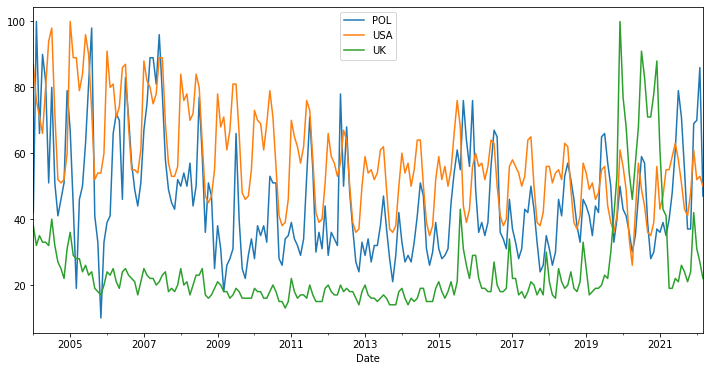

In [7]:
df.plot(figsize = (12, 6)).autoscale(axis = 'x', tight = True)

### generate descriptive statistics

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2004-01-01 to 2022-03-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   POL     219 non-null    int64
 1   USA     219 non-null    int64
 2   UK      219 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [9]:
df.describe()

,POL,USA,UK
count,219.000000,219.000000,219.000000
mean,45.794521,58.301370,24.543379
std,17.214213,14.830249,14.441330
min,10.000000,26.000000,13.000000
25%,33.000000,49.000000,17.000000
50%,42.000000,56.000000,20.000000
75%,54.000000,67.000000,24.500000
max,100.000000,100.000000,100.000000


### show three histograms in one plot

<AxesSubplot:ylabel='Frequency'>

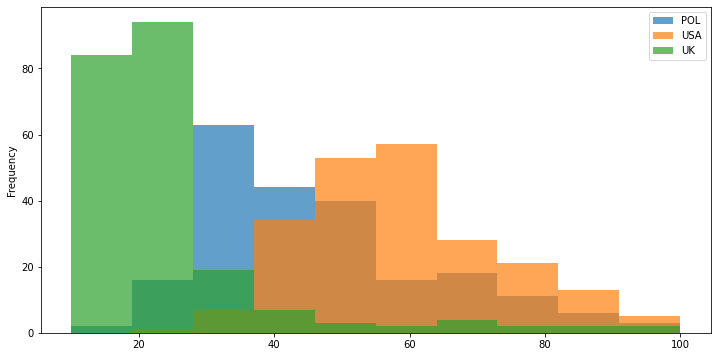

In [147]:
df.resample(rule = 'M').mean().plot.hist(figsize = (12, 6), alpha=0.7)

### show three kernel densities in one plot

<AxesSubplot:ylabel='Density'>

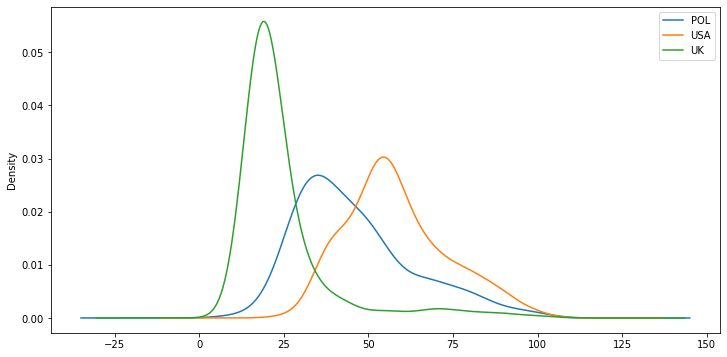

In [80]:
df.plot.kde(figsize = (12, 6))

# Task 2

### import data

In [121]:
# deleted few info rows because it caused problems when importing
df_NOOA = pd.read_csv("NOOA_St. Louis_Missouri.csv")
df_NOOA

,Date,Value,Anomaly
0,193901,38.1,7.7
1,194001,14.4,-16.0
2,194101,33.7,3.3
3,194201,31.1,0.7
4,194301,30.3,-0.1
...,...,...,...
79,201801,29.8,-0.6
80,201901,30.8,0.4
81,202001,35.7,5.3
82,202101,35.0,4.6


### locate missing values and change them to nan

In [122]:
df_NOOA_bool = df_NOOA != -99
df_NOOA = df_NOOA[df_NOOA_bool]
df_NOOA

,Date,Value,Anomaly
0,193901,38.1,7.7
1,194001,14.4,-16.0
2,194101,33.7,3.3
3,194201,31.1,0.7
4,194301,30.3,-0.1
...,...,...,...
79,201801,29.8,-0.6
80,201901,30.8,0.4
81,202001,35.7,5.3
82,202101,35.0,4.6


### use the interpolate function to put a value in the Nan’s place

In [123]:
df_NOOA_int = df_NOOA.interpolate()
df_NOOA_int

,Date,Value,Anomaly
0,193901,38.1,7.7
1,194001,14.4,-16.0
2,194101,33.7,3.3
3,194201,31.1,0.7
4,194301,30.3,-0.1
...,...,...,...
79,201801,29.8,-0.6
80,201901,30.8,0.4
81,202001,35.7,5.3
82,202101,35.0,4.6


### convert the index to datetime format

In [124]:
df_NOOA_int['Date'] = pd.to_datetime(df_NOOA_int['Date'], format='%Y%m')

In [125]:
df_NOOA_int.set_index('Date', inplace=True)

In [126]:
df_NOOA_int

,Value,Anomaly
Date,,
1939-01-01,38.1,7.7
1940-01-01,14.4,-16.0
1941-01-01,33.7,3.3
1942-01-01,31.1,0.7
1943-01-01,30.3,-0.1
...,...,...
2018-01-01,29.8,-0.6
2019-01-01,30.8,0.4
2020-01-01,35.7,5.3


### plot the average temperature time series, the corresponding histogram, and kernel density plot

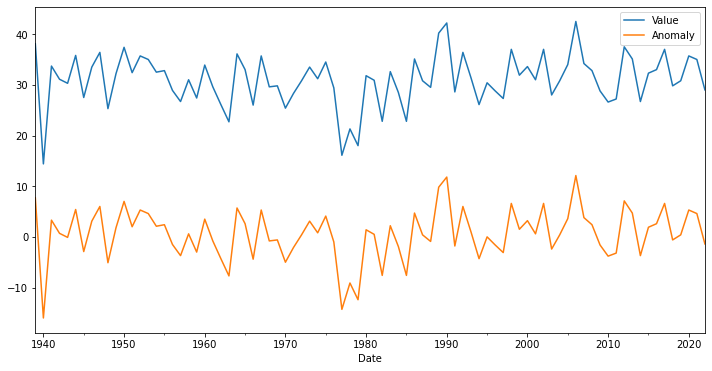

In [127]:
df_NOOA_int.plot(figsize = (12, 6)).autoscale(axis = 'x', tight = True)

<AxesSubplot:ylabel='Frequency'>

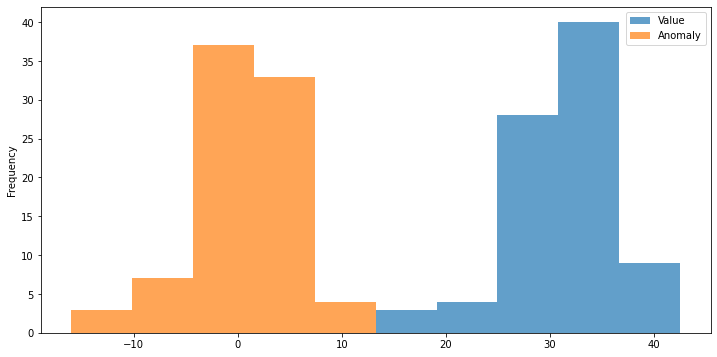

In [128]:
df_NOOA_int.plot.hist(figsize = (12, 6), alpha=0.7)

<AxesSubplot:ylabel='Density'>

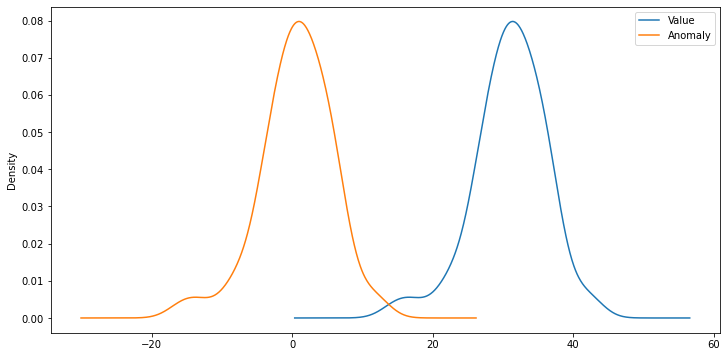

In [129]:
df_NOOA_int.plot.kde(figsize = (12, 6))

### generate descriptive statistics

In [130]:
df_NOOA_int.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 1939-01-01 to 2022-01-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Value    84 non-null     float64
 1   Anomaly  84 non-null     float64
dtypes: float64(2)
memory usage: 2.0 KB


In [131]:
df_NOOA_int.describe()

,Value,Anomaly
count,84.000000,84.000000
mean,30.983333,0.583333
std,5.131144,5.131144
min,14.400000,-16.000000
25%,28.450000,-1.950000
50%,31.050000,0.650000
75%,34.275000,3.875000
max,42.500000,12.100000


### where eagles dare; create a four-column table shown below the temperature plot at the NOOA website

In [132]:
df_NOOA_int.sort_values(by='Value', inplace=True)

In [134]:
rank = np.arange(1, 85, 1)

In [135]:
df_NOOA_int['Rank'] = rank.tolist()

In [137]:
df_NOOA_int.sort_index(inplace=True)

In [139]:
df_NOOA_int['Departure from mean (30.9 F)'] = df_NOOA_int['Value'] - 30.9

In [142]:
df_NOOA_int.drop(columns=['Anomaly'], inplace=True)

In [143]:
df_NOOA_int

,Value,Rank,Departure from mean (30.9 F)
Date,,,
1939-01-01,38.1,81,7.2
1940-01-01,14.4,1,-16.5
1941-01-01,33.7,60,2.8
1942-01-01,31.1,43,0.2
1943-01-01,30.3,34,-0.6
...,...,...,...
2018-01-01,29.8,33,-1.1
2019-01-01,30.8,38,-0.1
2020-01-01,35.7,69,4.8


In [144]:
# result is not 1:1 but fairly similar